<a href="https://colab.research.google.com/github/malarkeyfrancis/AI_NeuralNetworks/blob/main/Person_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Localization Data for Person Activity

In [25]:
!wget https://archive.ics.uci.edu/static/public/196/localization+data+for+person+activity.zip

--2024-11-19 00:24:40--  https://archive.ics.uci.edu/static/public/196/localization+data+for+person+activity.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘localization+data+for+person+activity.zip.1’

localization+data+f     [   <=>              ]   6.00M  13.0MB/s    in 0.5s    

2024-11-19 00:24:41 (13.0 MB/s) - ‘localization+data+for+person+activity.zip.1’ saved [6290730]



In [ ]:
!unzip /content/localization+data+for+person+activity.zip

Archive:  /content/localization+data+for+person+activity.zip
replace ConfLongDemo_JSI.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

## Code

In [28]:
df = pd.read_csv("/content/ConfLongDemo_JSI.txt",header=None)
df

,0,1,2,3,4,5,6,7
0,A01,010-000-024-033,633790226051280329,27.05.2009 14:03:25:127,4.062931,1.892434,0.507425,walking
1,A01,020-000-033-111,633790226051820913,27.05.2009 14:03:25:183,4.291954,1.781140,1.344495,walking
2,A01,020-000-032-221,633790226052091205,27.05.2009 14:03:25:210,4.359101,1.826456,0.968821,walking
3,A01,010-000-024-033,633790226052361498,27.05.2009 14:03:25:237,4.087835,1.879999,0.466983,walking
4,A01,010-000-030-096,633790226052631792,27.05.2009 14:03:25:263,4.324462,2.072460,0.488065,walking
...,...,...,...,...,...,...,...,...
164855,E05,010-000-030-096,633790146419554374,27.05.2009 11:50:41:957,3.209474,2.044571,0.062902,walking
164856,E05,010-000-024-033,633790146419824669,27.05.2009 11:50:41:983,3.386878,2.004729,0.395161,walking
164857,E05,020-000-033-111,633790146420094965,27.05.2009 11:50:42:010,3.188895,1.915717,1.353087,walking
164858,E05,010-000-030-096,633790146420635550,27.05.2009 11:50:42:063,3.150169,1.931164,0.055037,walking


In [29]:
column_names = [
    'Sequence Name', 'Tag Identifier', 'Timestamp', 'Date', 'X Coordinate',
    'Y Coordinate', 'Z Coordinate', 'Activity']

In [30]:
df.columns = column_names
df.head()

,Sequence Name,Tag Identifier,Timestamp,Date,X Coordinate,Y Coordinate,Z Coordinate,Activity
0,A01,010-000-024-033,633790226051280329,27.05.2009 14:03:25:127,4.062931,1.892434,0.507425,walking
1,A01,020-000-033-111,633790226051820913,27.05.2009 14:03:25:183,4.291954,1.781140,1.344495,walking
2,A01,020-000-032-221,633790226052091205,27.05.2009 14:03:25:210,4.359101,1.826456,0.968821,walking
3,A01,010-000-024-033,633790226052361498,27.05.2009 14:03:25:237,4.087835,1.879999,0.466983,walking
4,A01,010-000-030-096,633790226052631792,27.05.2009 14:03:25:263,4.324462,2.072460,0.488065,walking


In [31]:
X_clustering = df[['X Coordinate','Y Coordinate','Z Coordinate']]

scaler_clustering = StandardScaler()
X_clustering_scaled = scaler_clustering.fit_transform(X_clustering)

In [32]:
kmeans = KMeans(n_clusters=6, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(X_clustering_scaled)

In [33]:
df.head()

,Sequence Name,Tag Identifier,Timestamp,Date,X Coordinate,Y Coordinate,Z Coordinate,Activity,Cluster_KMeans
0,A01,010-000-024-033,633790226051280329,27.05.2009 14:03:25:127,4.062931,1.892434,0.507425,walking,5
1,A01,020-000-033-111,633790226051820913,27.05.2009 14:03:25:183,4.291954,1.781140,1.344495,walking,4
2,A01,020-000-032-221,633790226052091205,27.05.2009 14:03:25:210,4.359101,1.826456,0.968821,walking,4
3,A01,010-000-024-033,633790226052361498,27.05.2009 14:03:25:237,4.087835,1.879999,0.466983,walking,5
4,A01,010-000-030-096,633790226052631792,27.05.2009 14:03:25:263,4.324462,2.072460,0.488065,walking,3


Text(0.5, 1.0, 'K-Means Clustering')

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


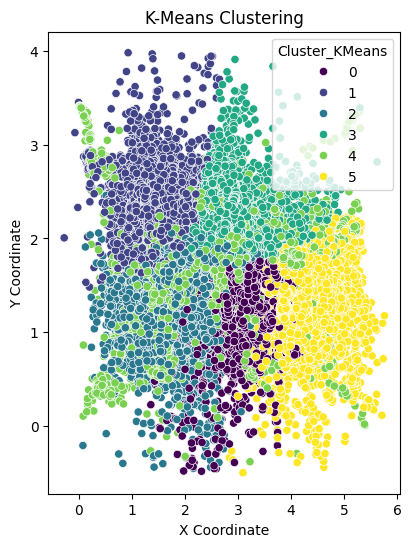

In [34]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='X Coordinate', y='Y Coordinate', hue='Cluster_KMeans', palette="viridis", data=df)
plt.title('K-Means Clustering')